In [1]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle
from array import array
import numpy as np
import math

xcanvas = 1000
ycanvas = 500

c1 = TCanvas( 'c1', 'XY Projectile', 0, 0, xcanvas, ycanvas )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c2 = TCanvas( 'c2', 'XT Projectile', 0, 0, xcanvas, ycanvas )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )
c3 = TCanvas( 'c3', 'YT Projectile', 0, 0, xcanvas, ycanvas )
c3.SetGridx()
c3.SetGridy()
c3.GetFrame().SetFillColor( 21 )
c3.GetFrame().SetBorderMode(-1 )
c3.GetFrame().SetBorderSize( 5 )
c4 = TCanvas( 'c4', 'VT Projectile', 0, 0, xcanvas, ycanvas )
c4.SetGridx()
c4.SetGridy()
c4.GetFrame().SetFillColor( 21 )
c4.GetFrame().SetBorderMode(-1 )
c4.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.18/00


In [2]:
# Initial Conditions
speed = 0.0
theta = 0.0
y1 = 20000.0


# Other constants
Cd = 0.35 # drag coefficient
area = 1.47 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 80.0 # mass in kg

# Atmospheric constants
T0=288.15
L=0.0065
M=0.0289644
R=8.31447
p0=101325.0
Re=6.4E6

# Atmospheric variation of gravity, pressure, temperature, density
glocal = grav*math.pow((Re/(Re+y1)),2)
pressure = p0*pow((1.0-L*y1/T0),(glocal*M/(R*L)))
temperature = T0 - L*y1
rho = pressure*M/(R*temperature)
air_const = -0.5*Cd*rho*area/mass

Pi = math.pi

In [3]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(0)

In [4]:
tau = 0.001 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
vplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
vNoAir = array('d')
time = array('d')

In [5]:
endtime = 0
nelements = 0
for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    vplot.append(v[1])
    t = (iStep-1)*tau
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    vNoAir.append(v[1]-glocal*t)
    normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
    accel[0]=air_const*normV*v[0]
    accel[1]=air_const*normV*v[1]-glocal
    
    r[0] = r[0] + tau*v[0]
    r[1] = r[1] + tau*v[1]
    v[0] = v[0] + tau*accel[0]
    v[1] = v[1] + tau*accel[1]
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    
    time.append(tau*(iStep-1))
    
    glocal = grav*math.pow((Re/(Re+r[1])),2)
    pressure = p0*pow((1.0-L*r[1]/T0),(glocal*M/(R*L)))
    temperature = T0 - L*r[1]
    rho = pressure*M/(R*temperature)
    air_const = -0.5*Cd*rho*area/mass
    
    if (r[1] < 2400):
        xplot.append(r[0])
        yplot.append(r[1])
        vplot.append(v[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
print ("Maximum range is %f meters." % r[0])
print ("Time of flight is %f seconds." % endtime)

max_y = np.amax(yNoAir)+1
max_x = np.amax(xNoAir)+1
max_t = np.amax(time)+1
max_v = np.amax(vplot)+1
min_v = np.amin(vplot)+1

print ("Max y = %f" % max_y)
print ("Number of elements = %d" % nelements)

Maximum range is 0.000000 meters.
Time of flight is 202.146000 seconds.
Max y = 20001.000000
Number of elements = 202146


In [6]:
gr = TGraph(nelements,xplot,yplot)
grr = TGraph(nelements,xNoAir,yNoAir)
gxt = TGraph(nelements,time,xplot)
gxtt = TGraph(nelements,time,xNoAir)
gyt = TGraph(nelements,time,yplot)
gytt = TGraph(nelements,time,yNoAir)
gvt = TGraph(nelements,time,vplot)
gvtt = TGraph(nelements,time,vNoAir)

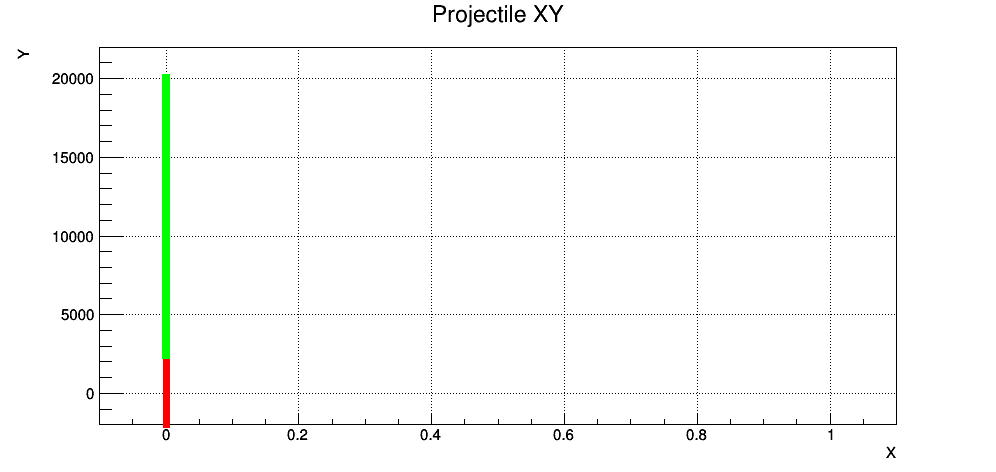

In [11]:
gr.SetMarkerColor(3)
grr.SetMarkerColor(2)
gr.SetMarkerStyle(21)
grr.SetMarkerStyle(22)
grr.SetTitle("Projectile XY")
grr.GetXaxis().SetTitle("X")
grr.GetYaxis().SetTitle("Y")
axis = grr.GetXaxis()
axis.SetLimits(-0.1*max_x,1.1*max_x)
grr.GetHistogram().SetMaximum(1.1*max_y)
grr.GetHistogram().SetMinimum(-0.1*max_y)

c1.cd()
grr.Draw("AP")
gr.Draw("P")
c1.Draw()

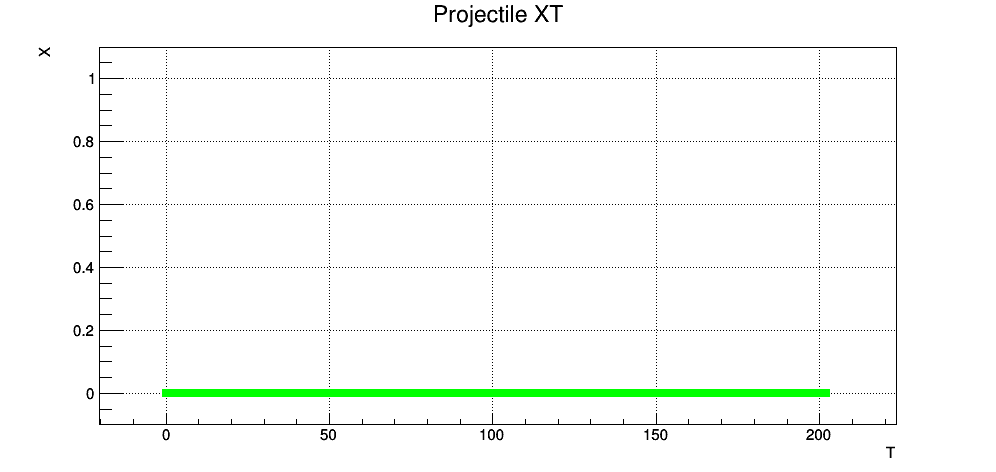

In [8]:
gxt.SetMarkerColor(3)
gxtt.SetMarkerColor(2)
gxt.SetMarkerStyle(21)
gxtt.SetMarkerStyle(22)
gxtt.SetTitle("Projectile XT")
gxtt.GetXaxis().SetTitle("T")
gxtt.GetYaxis().SetTitle("X")
axis = gxtt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gxtt.GetHistogram().SetMaximum(1.1*max_x)
gxtt.GetHistogram().SetMinimum(-0.1*max_x)

c2.cd()
gxtt.Draw("AP")
gxt.Draw("P")
c2.Draw()

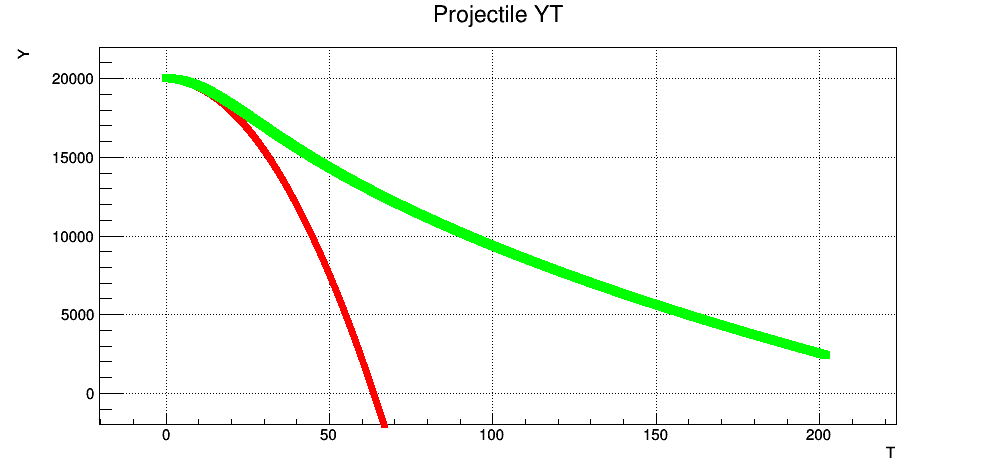

In [9]:
gyt.SetMarkerColor(3)
gytt.SetMarkerColor(2)
gyt.SetMarkerStyle(21)
gytt.SetMarkerStyle(22)
gytt.SetTitle("Projectile YT")
gytt.GetXaxis().SetTitle("T")
gytt.GetYaxis().SetTitle("Y")
axis = gytt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gytt.GetHistogram().SetMaximum(1.1*max_y)
gytt.GetHistogram().SetMinimum(-0.1*max_y)

c3.cd()
gytt.Draw("AP")
gyt.Draw("P")
c3.Draw()

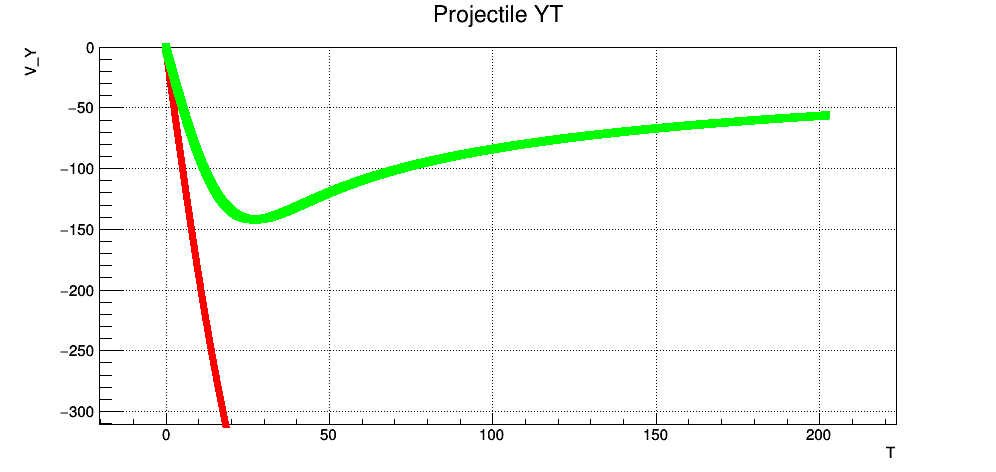

In [12]:
gvt.SetMarkerColor(3)
gvtt.SetMarkerColor(2)
gvt.SetMarkerStyle(21)
gvtt.SetMarkerStyle(22)
gvtt.SetTitle("Projectile YT")
gvtt.GetXaxis().SetTitle("T")
gvtt.GetYaxis().SetTitle("V_Y")
axis = gvtt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gvtt.GetHistogram().SetMaximum(1.1*min_v)
gvtt.GetHistogram().SetMinimum(-0.1*min_v)

c4.cd()
gvtt.Draw("AP")
gvt.Draw("P")
c4.Draw()